In [19]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftshift, ifft
from scipy import signal

In [20]:
# Square pulse
def square(t):
    if t % 1 < 0.25 or t % 1 > 0.75:
        s = 1
    elif t % 1 == 0.25 or t % 1 == 0.75:
        s = 0.5
    else:
        s = 0
    return s


# Fourier series coefficients
def a(k):
    # Your code goes here
    if k == 0:
        return 0.5
    a_k = np.sin(k * (np.pi / 2)) / (k * np.pi)

    return a_k

In [21]:
def fs_approx(t, N):
    # Your code goes here
    T = 1
    w0 = 2 * np.pi / T
    x_t = 0

    for i in range(-N, N + 1):
        x_t += (a(i) * np.e ** (1j * i * w0 * t)).real

    return x_t

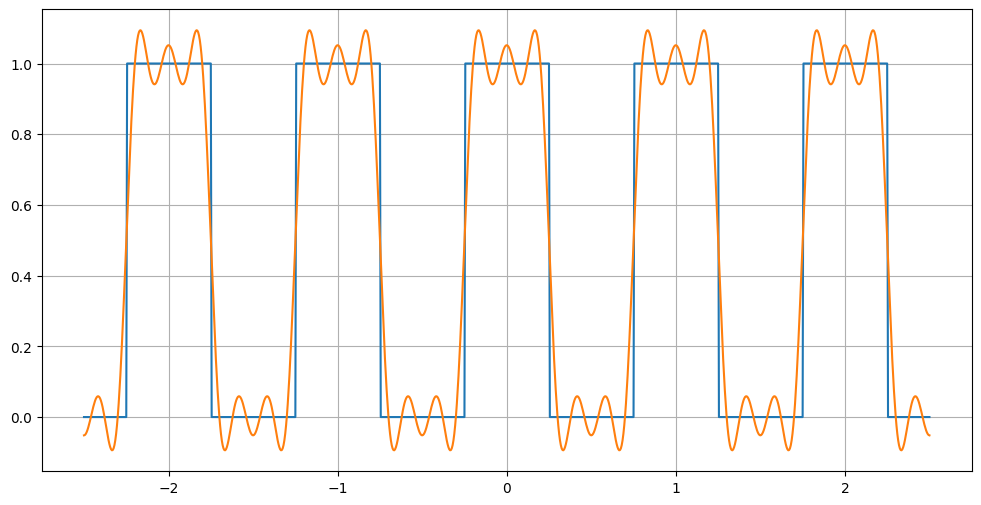

In [22]:
# Fourier series approximation of the square wave
x = []
y = []
N = 5  # CHANGE HERE
# N = 50

time = np.arange(-2.5, 2.5 + (5 / 1000), 5 / 1000)  # Your code goes here
for t in time:
    # Your code goes here
    x.append(square(t))
    y.append(fs_approx(t, N))
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(time, x)
ax.plot(time, y)
ax.grid()

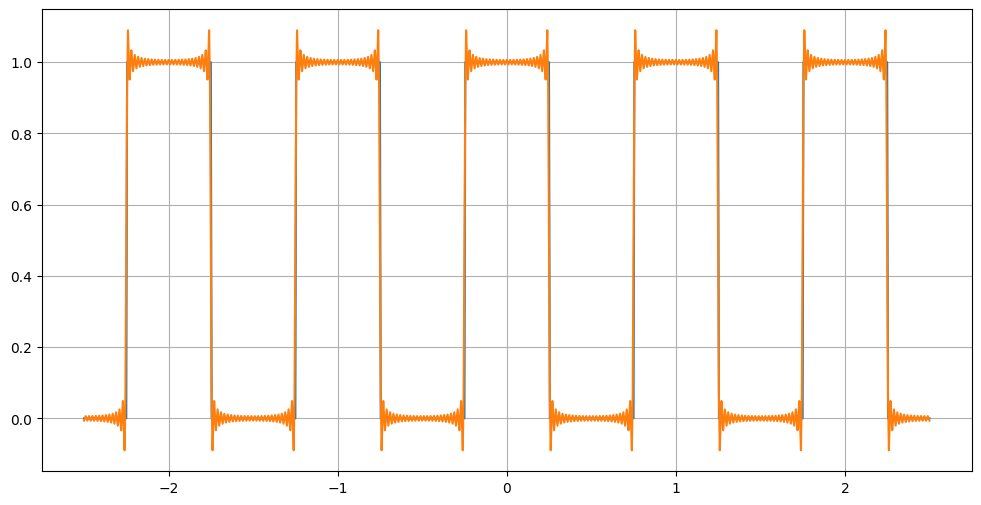

In [23]:
x1 = []
y1 = []
N = 50 # CHANGE HERE
time = np.arange(-2.5, 2.5+5/1000,5/1000)
fig,ax=plt.subplots(figsize=(12,6))
for t in time:
 x1.append(square(t))
 y1.append(fs_approx(t,N))
ax.plot(time,x1)
ax.plot(time,y1)
ax.grid()

plt.show()

# 2.2 Fourier Series Coefficients

plotting Fourier Series coefficients of the square wave aganist k

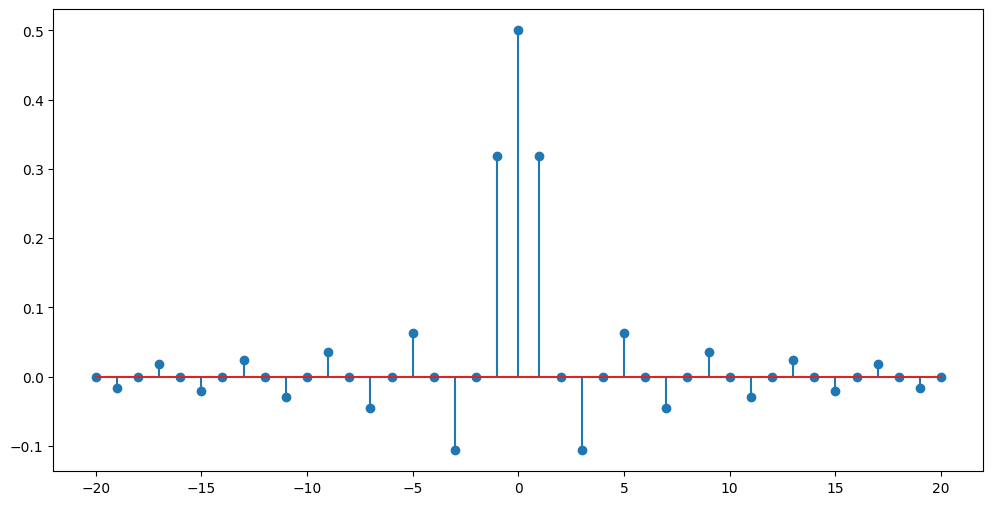

In [24]:
k = np.arange(-20, 20 + 1, 1)
ak = []
for i in k:
    ak.append(a(i))
fig, ax = plt.subplots(figsize=(12, 6))
ax.stem(k, ak)
plt.show()

Plotting normalized Fast Fourier Transform (FFT) coefficients against k

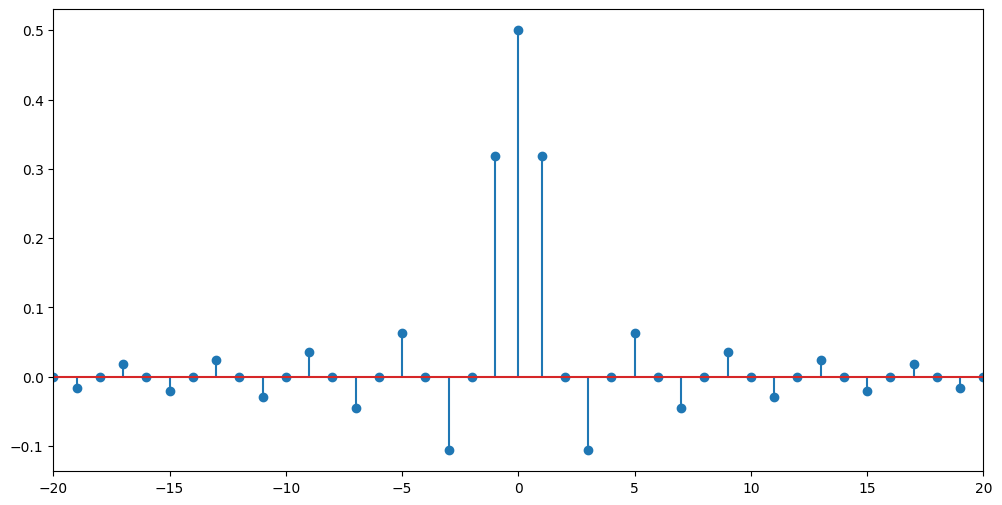

In [25]:
N = 200
t = np.linspace(0, 1 - 1 / N, N)
x = []
for i in t:
    x.append(square(i))
# Obtaining FFT coefficients

X = fftshift(fft(x))
X_norm = X.real / N
k = np.linspace(-N / 2, N / 2 - 1, N)

fig, ax = plt.subplots(figsize=(12, 6))
ax.stem(k, X_norm)
ax.set_xlim(-20, 20)
plt.show()

Q: Comment on the observations from the above codes

    Both graphs are same.

# 2.3 Ideal Filters and Actual Filters

(0.0, 0.04)

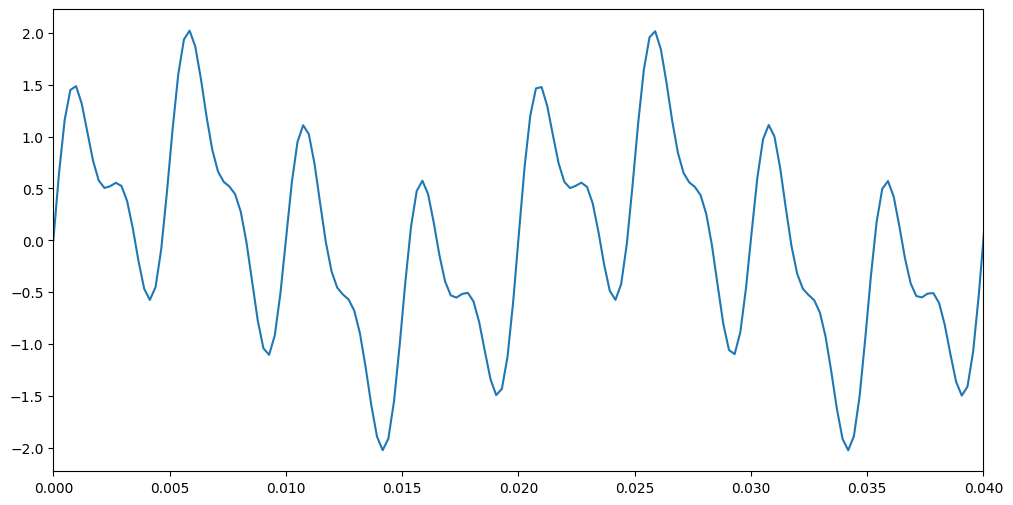

In [26]:
# Creating 3 sinusoidal signals
# Your code goes here
w1 = 100*np.pi
w2 = 400*np.pi
w3 = 800*np.pi
a1 = 0.75
a2 = 1
a3 = 0.5
fs = 4095
ws = 2*np.pi*fs
def x(t):
# Your code goes here
  x_t = a1*np.sin(w1*t)+a2*np.sin(w2*t)+a3*np.sin(w3*t)
  return x_t

time = np.linspace(0,1,fs+1)
xt = [x(t_) for t_ in time]
# Plotting the input signal in time domain
# our code goes here
fig,ax=plt.subplots(figsize=(12,6))
ax.plot(time,xt)
ax.set_xlim(0,0.04)

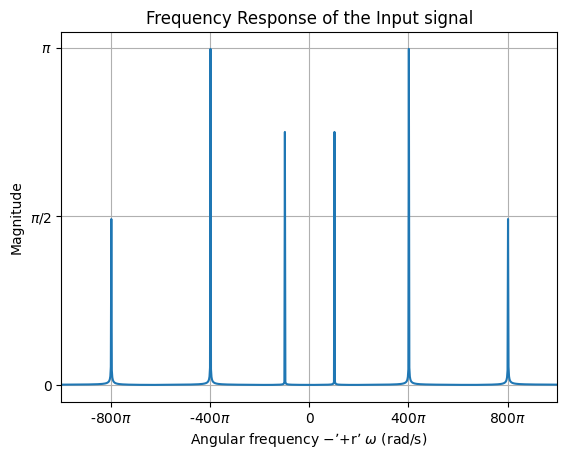

In [27]:
Xw = fft(xt, 4096)*2*np.pi/fs
Xw = fftshift(Xw)
k = np.arange(1,4097)
w = k/4096*ws - ws/2

# Plotting the input signal in frequency domain
fig, ax = plt.subplots()

# Your code goes here
xw_ab=np.abs(Xw)
ax.plot(w,xw_ab)

ax.set_title('Frequency Response of the Input signal')
ax.set_xlabel('Angular frequency −’+r’ $\omega$ (rad/s)')
ax.set_ylabel('Magnitude')
ax.set_xticks(np.arange(-1200*np.pi, 1200*np.pi+1,400*np.pi))
ax.set_xticklabels([str(i)+(r'$\pi$' if i else'') for i in range(-1200,1210,400)])
ax.set_xlim(-1000*np.pi, 1000*np.pi)
ax.set_yticks([0,np.pi/2,np.pi])
ax.set_yticklabels([0,r'$\pi$/2',r'$\pi$'])
plt.grid()

In [28]:
# Ideal filter
wc1 = (w1+w2)/2
wc2 = (w2+w3)/2

def ideal_filter(w):
  # Your code goes here
  gain = 1
  if wc1>=abs(w) or wc2<=abs(w):
    gain=0
  return gain

# 2.3.1 Ideal Filter: Part A

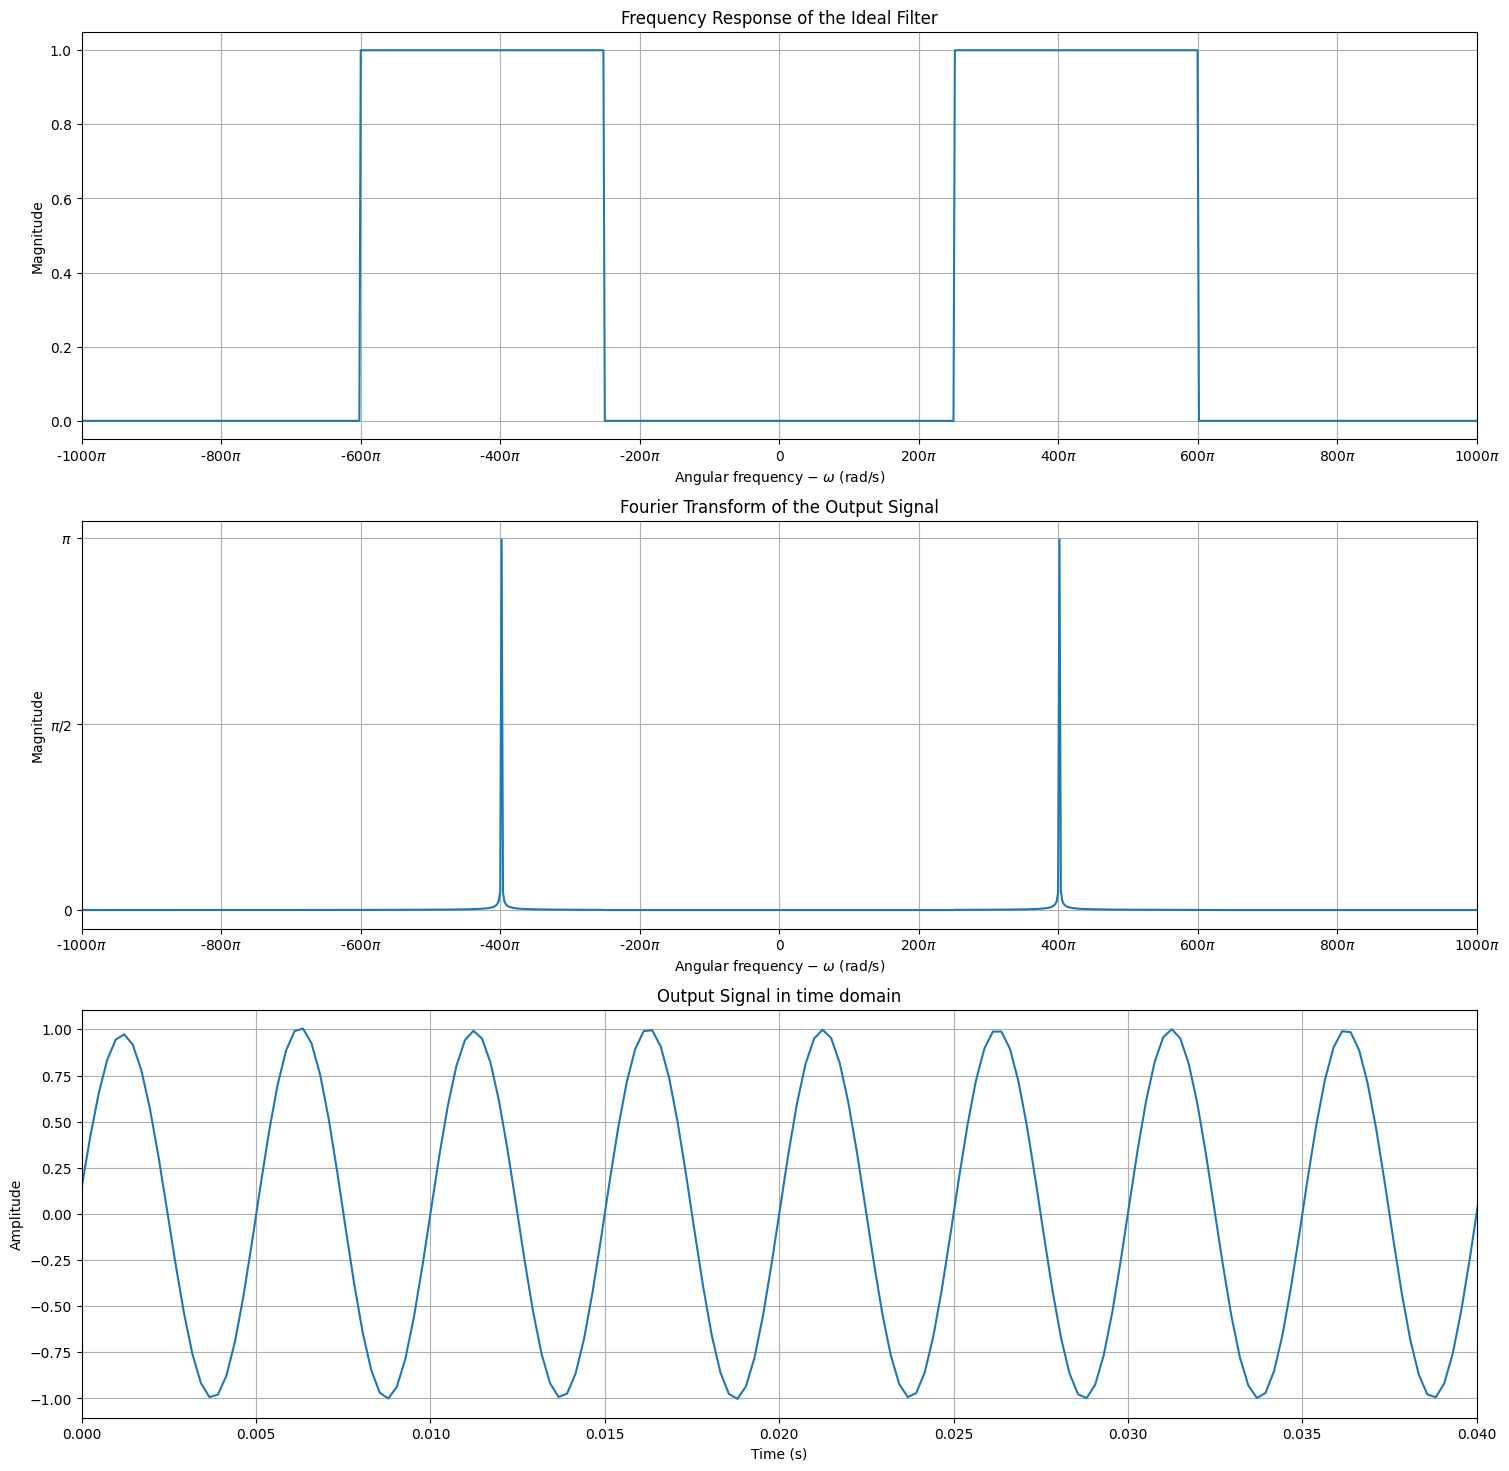

In [29]:
k = np.arange(1,4097)
w = k/4096*ws - ws/2
# Your code goes here
H0w=[]
for i in w:
  H0w.append(ideal_filter(i))

# Simulation of Filtering
Y0w = np.multiply(Xw,H0w)

# Obtaining the time domain signal
y0t = ifft(fftshift(Y0w*fs/(2*np.pi)))

# Ideal filter frequency response (magnitude)
fig, axes = plt.subplots(3,1, figsize=(18,18))
axes[0].plot(w,H0w)
axes[0].set_title('Frequency Response of the Ideal Filter')
axes[0].set_xlabel('Angular frequency −'+r' $\omega$ (rad/s)')
axes[0].set_ylabel('Magnitude')
axes[0].set_xticks(np.arange(-1200*np.pi, 1200*np.pi+1,200*np.pi))
axes[0].set_xticklabels([str(i)+(r'$\pi$' if i else '') for i in range(-1200,1210,200)])
axes[0].set_xlim(-1000*np.pi, 1000*np.pi)
axes[0].grid()

# Frequency response of the ideal filter output (magnitude)
axes[1].plot(w,abs(Y0w))
axes[1].set_title('Fourier Transform of the Output Signal')
axes[1].set_xlabel('Angular frequency −'+r' $\omega$ (rad/s)')
axes[1].set_ylabel('Magnitude')
axes[1].set_xticks(np.arange(-1200*np.pi, 1200*np.pi+1,200*np.pi))
axes[1].set_xticklabels([str(i)+(r'$\pi$' if i else '') for i in range(-1200,1210,200)])
axes[1].set_xlim(-1000*np.pi, 1000*np.pi)
axes[1].set_yticks([0,np.pi/2,np.pi])
axes[1].set_yticklabels([0,r'$\pi$/2',r'$\pi$'])
axes[1].grid()

# Output signal in time domain
axes[2].plot(time,np.real(y0t))
axes[2].set_title('Output Signal in time domain')
axes[2].set_xlabel('Time (s)')
axes[2].set_ylabel('Amplitude')
axes[2].set_xlim(0, 0.04)
axes[2].grid()

# 2.3.2 Ideal Filter: Part B

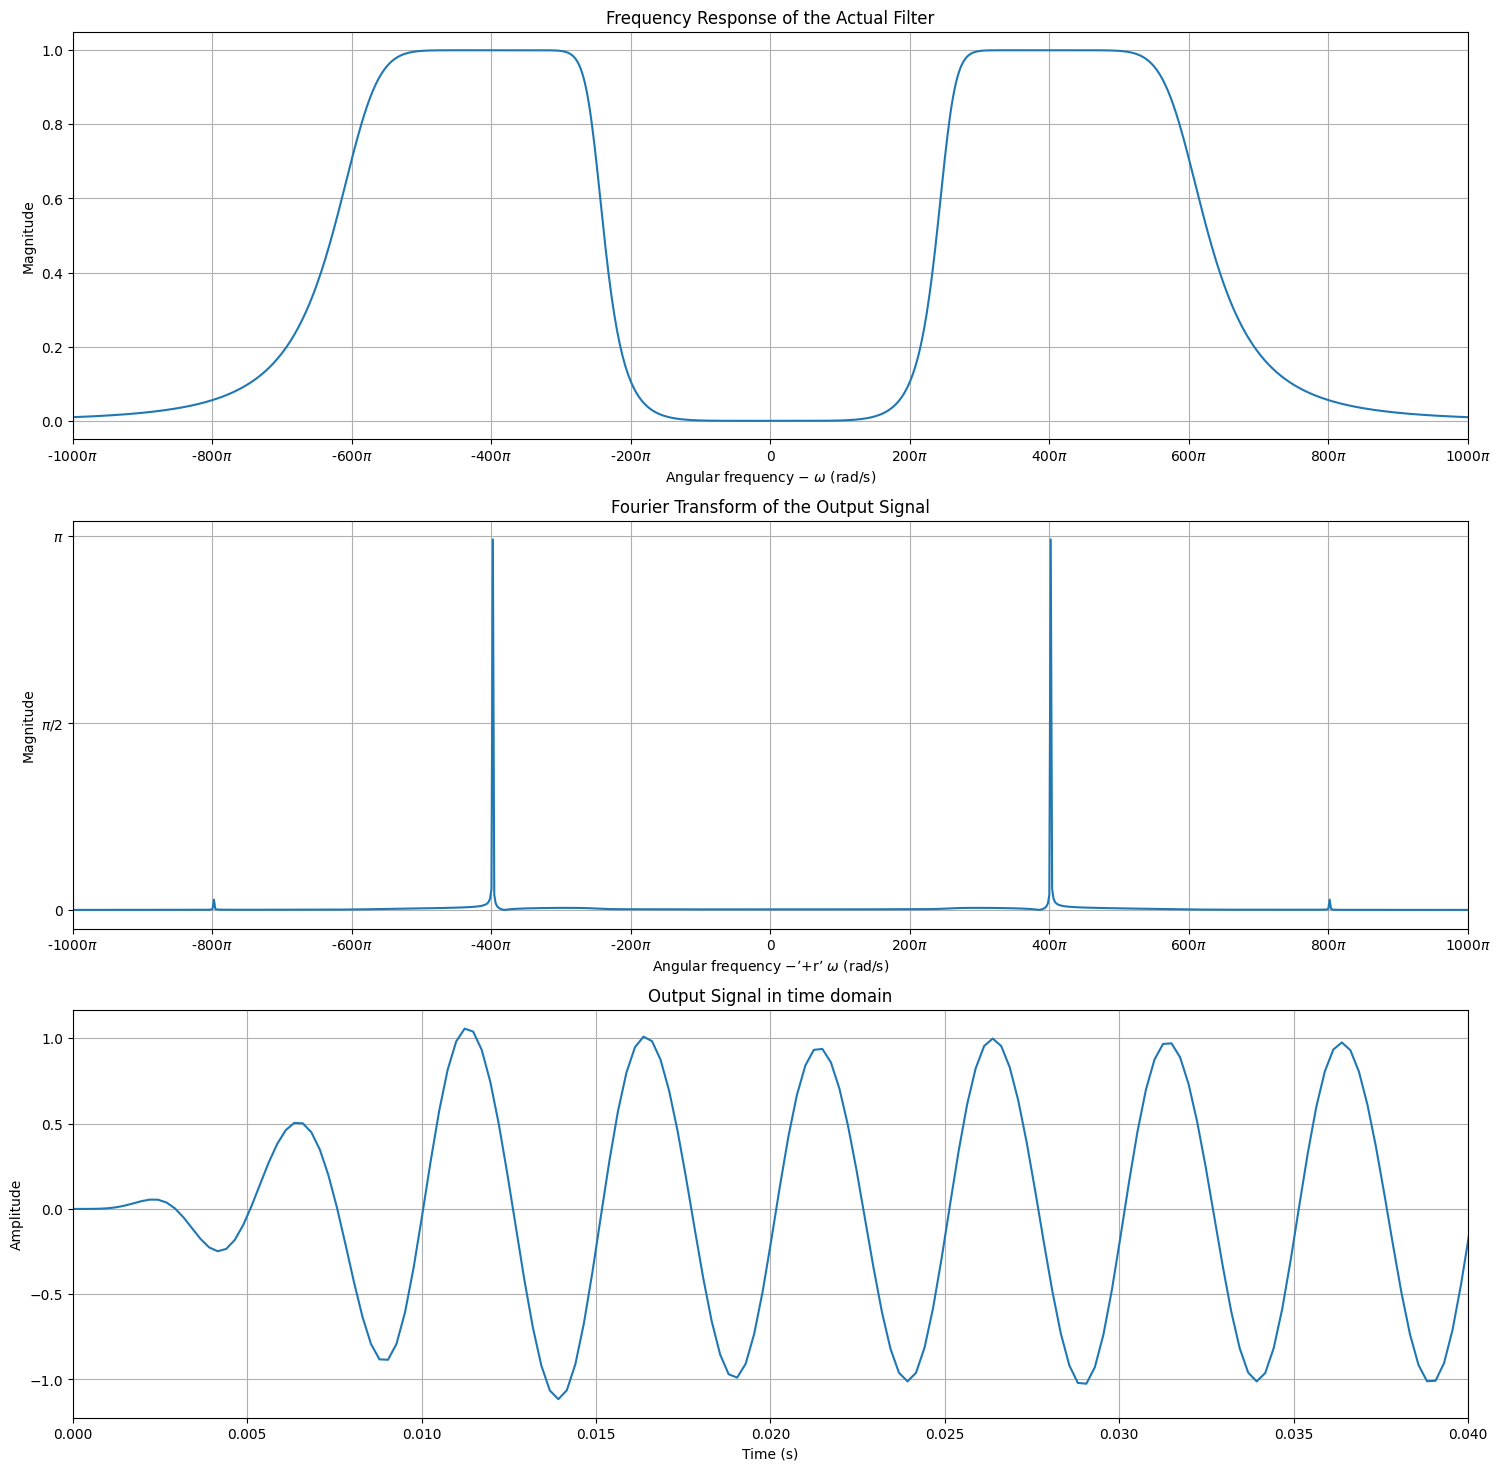

In [30]:
# Actual Filter
b, a = signal.butter(5, [2*wc1/ws, 2*wc2/ws], 'bandpass', analog=False)
ww, h = signal.freqz(b, a, 2047)
ww = np.append(-np.flipud(ww), ww)*ws/(2*np.pi)
h = np.append(np.flipud(h), h)

# Filtering
y = signal.lfilter(b,a,xt)

# Obtaining the frequency response of the output signal
Y = fft(y,4096)*2*np.pi/fs
Y = fftshift(Y)

# Actual filter frequency response (magnitude)
fig, axes = plt.subplots(3,1, figsize=(18,18))
axes[0].plot(ww, abs(h) )
axes[0].set_xlabel('Angular frequency −'+r' $\omega$ (rad/s)')
axes[0].set_ylabel('Magnitude')
axes[0].set_title('Frequency Response of the Actual Filter')
axes[0].set_xticks(np.arange(-1200*np.pi, 1200*np.pi+1,200*np.pi))
axes[0].set_xticklabels([str(i)+(r'$\pi$' if i else '') for i in range(-1200,1210,200)])
axes[0].set_xlim(-1000*np.pi, 1000*np.pi)
axes[0].grid()

# Frequency response of the actual filter output (magnitude)
axes[1].plot(w,abs(Y))
axes[1].set_title('Fourier Transform of the Output Signal')
axes[1].set_xlabel('Angular frequency −’+r’ $\omega$ (rad/s)')
axes[1].set_ylabel('Magnitude')
axes[1].set_xticks(np.arange(-1200*np.pi, 1200*np.pi+1,200*np.pi))
axes[1].set_xticklabels([str(i)+(r'$\pi$' if i else '') for i in range(-1200,1210,200)])
axes[1].set_xlim(-1000*np.pi, 1000*np.pi)
axes[1].set_yticks([0,np.pi/2,np.pi])
axes[1].set_yticklabels([0,r'$\pi$/2',r'$\pi$'])
axes[1].grid()

# # Output signal in time domain
axes[2].plot(time,np.real(y))
axes[2].set_title('Output Signal in time domain')
axes[2].set_xlabel('Time (s)')
axes[2].set_ylabel('Amplitude')
axes[2].set_xlim(0, 0.04)
axes[2].grid()

Q: Comment on your observations in Part - A and Part - B.

    In actual filter there are some frequency parts in the transition stage still there in the filtered signal

# 2.4 Removing Power Line Noise in an ECG Signal

Task 1

In [31]:
# Reading the ECG data
ecg = np.loadtxt("C:\\Users\\Januka\Desktop\\signal lab 2\\signal lab 2\\ecg_signal.csv")

In [32]:
duration = 10 # seconds
T = duration/len(ecg)
Fs = 1/T

# Obtaining the fourier transform
F = fftshift(fft(ecg))
fr = np.linspace(-Fs/2, Fs/2, len(F))

Task 2

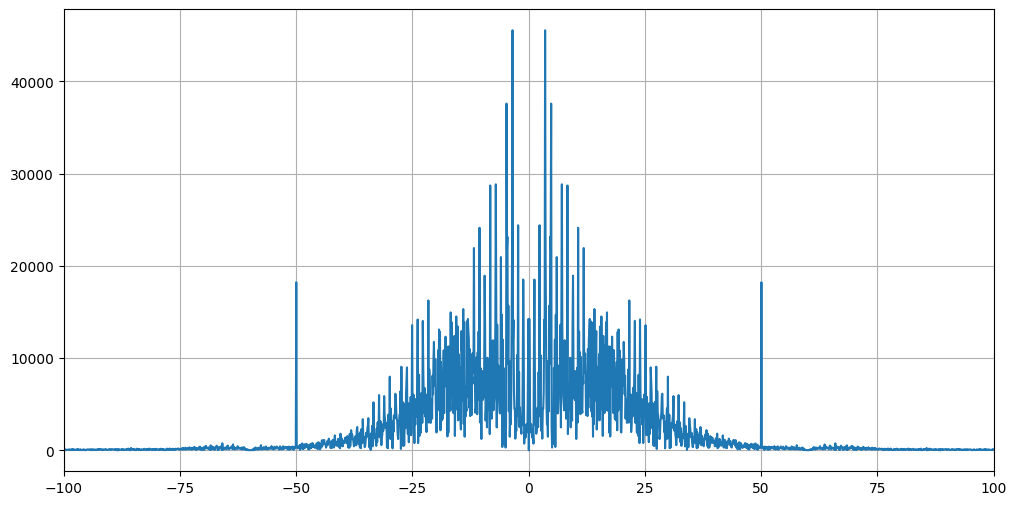

In [33]:
fig,ax=plt.subplots(figsize=(12,6))
ax.plot(fr,abs(F))
ax.set_xlim(-100, 100)
plt.grid()

Task 3

50Hz Bandstop filter

Task 4

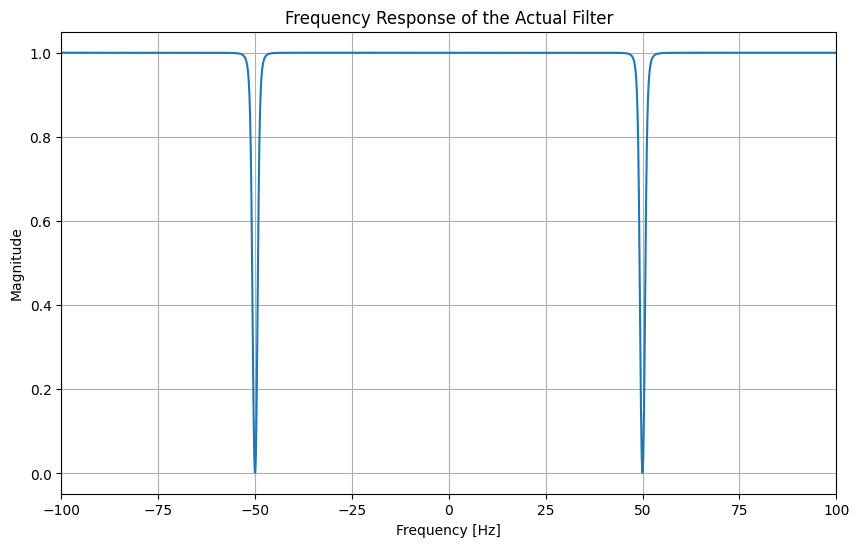

In [34]:
# Designing the filter
f1 = 49
f2 = 51
filter_type = 'bandstop' # EDIT HERE
b, a = signal.butter(2, [2*f1/Fs, 2*f2/Fs], filter_type , analog=False)

# Obtaining the frequency response of the filter
ww, h = signal.freqz(b, a, 2047)
ww = np.append(-np.flipud(ww), ww)
h = np.append(np.flipud(h), h)

# Plotting the frequency response
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(ww*Fs/(2*np.pi), abs(h) )
ax.set_title('Frequency Response of the Actual Filter')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Magnitude')
ax.set_xlim(-100,100)
ax.grid()

Task 5

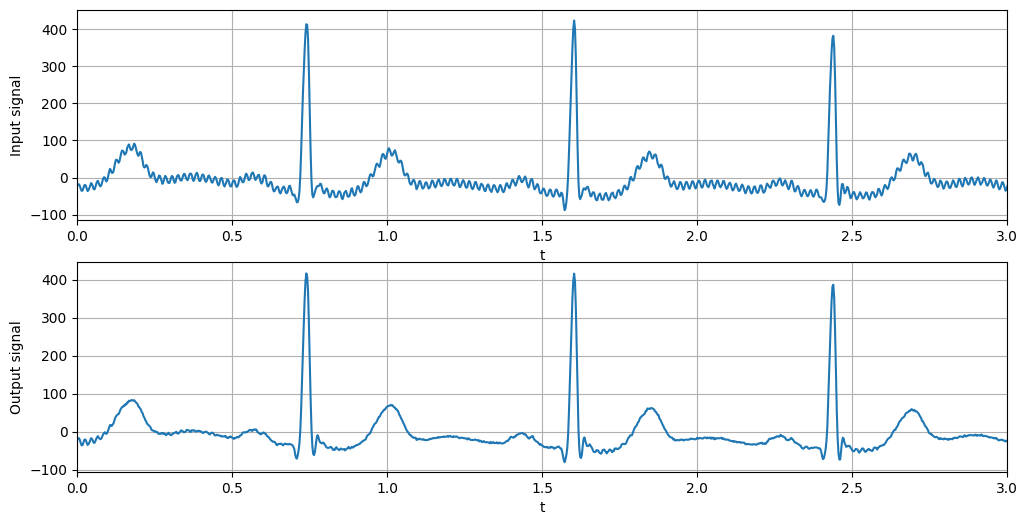

In [35]:
time = np.arange(T, duration+T, T)
# Filtering the ECG wavefoem
output = signal.lfilter(b, a, ecg)

fig,axes = plt.subplots(2,1,figsize=(12,6))
axes[0].plot(time,ecg)
axes[0].set_xlabel("t")
axes[0].set_ylabel("Input signal")
axes[0].set_xlim(0,3)
axes[0].grid()

axes[1].plot(time,output)
axes[1].set_xlabel("t")
axes[1].set_ylabel("Output signal")
axes[1].set_xlim(0,3)
axes[1].grid()

Task 6

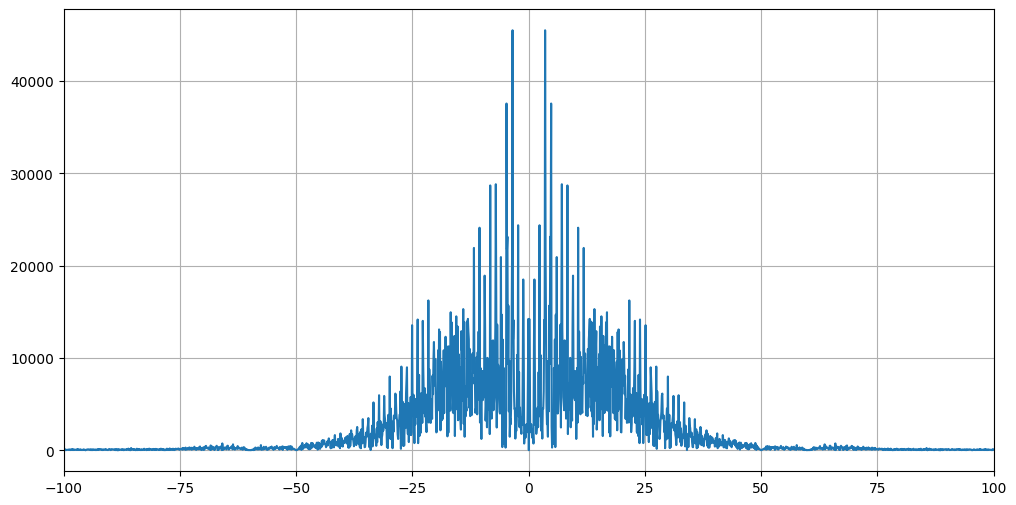

In [36]:
F = fftshift(fft(output))
fr = np.linspace(-Fs/2, Fs/2, len(F))
fig,ax=plt.subplots(figsize=(12,6))
ax.plot(fr,abs(F))
ax.set_xlim(-100, 100)
plt.grid()